In [1]:
import pandas as pd

df = pd.read_csv('data/train.csv')
display(df.head(10))
df.columns

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

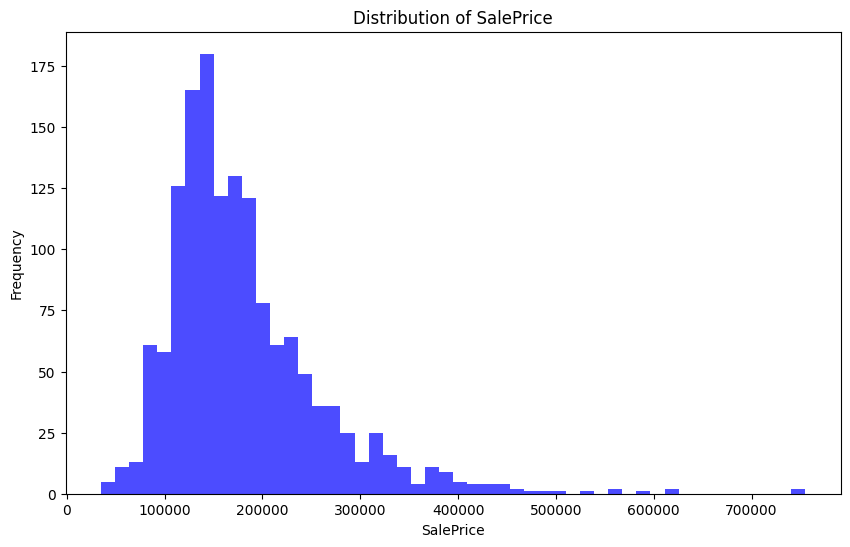

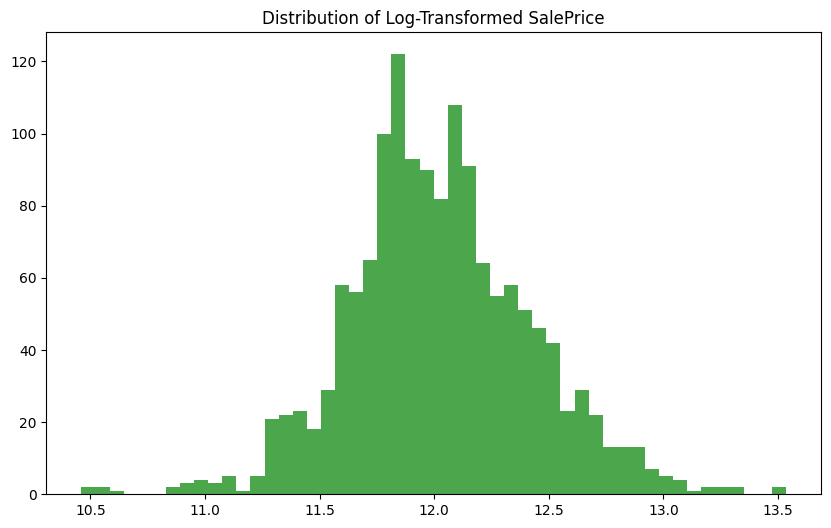

In [2]:
## Lets first start with EDA on the target variable 'SalePrice'. Lets plot the distribution first

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df['SalePrice'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')

# as can be seen, the distribtution is right-skewed. theis might cause issues, so lets see if applying log transformation helps
plt.figure(figsize=(10,6))
plt.hist(np.log1p(df['SalePrice']), bins=50, color='green', alpha=0.7)
plt.title('Distribution of Log-Transformed SalePrice')

# the log transformation has made the distribution better in bell shape curve. lets save this transformed target
df['Log_SalePrice'] = np.log1p(df['SalePrice'])     # new target function -> Log_SalePrice

# based on this observation, there might be even more skewed data, but first lets do some other EDAs to avoid big chunk of calculations now

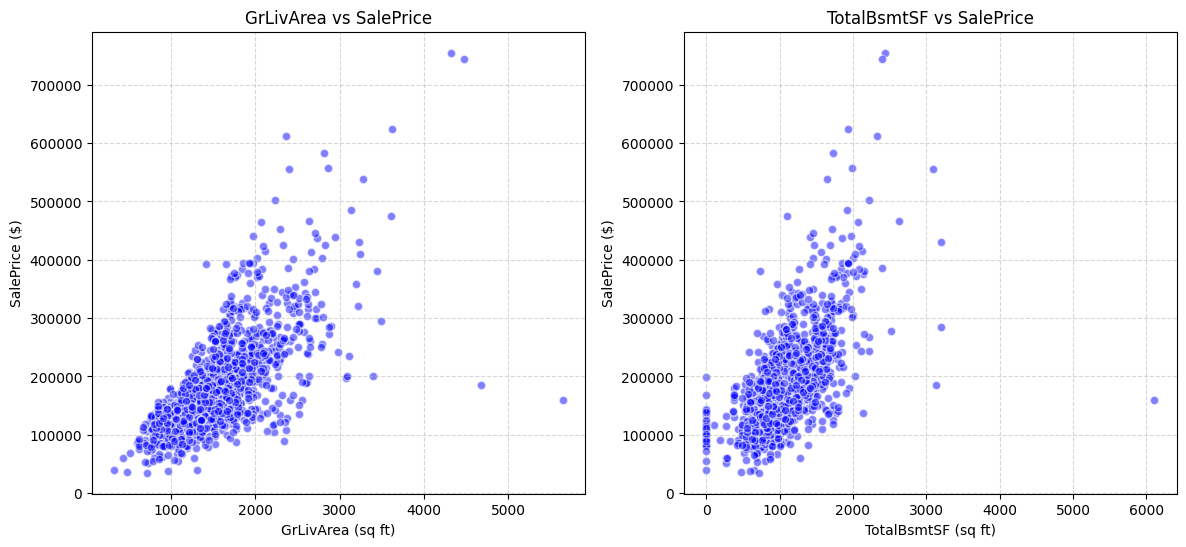

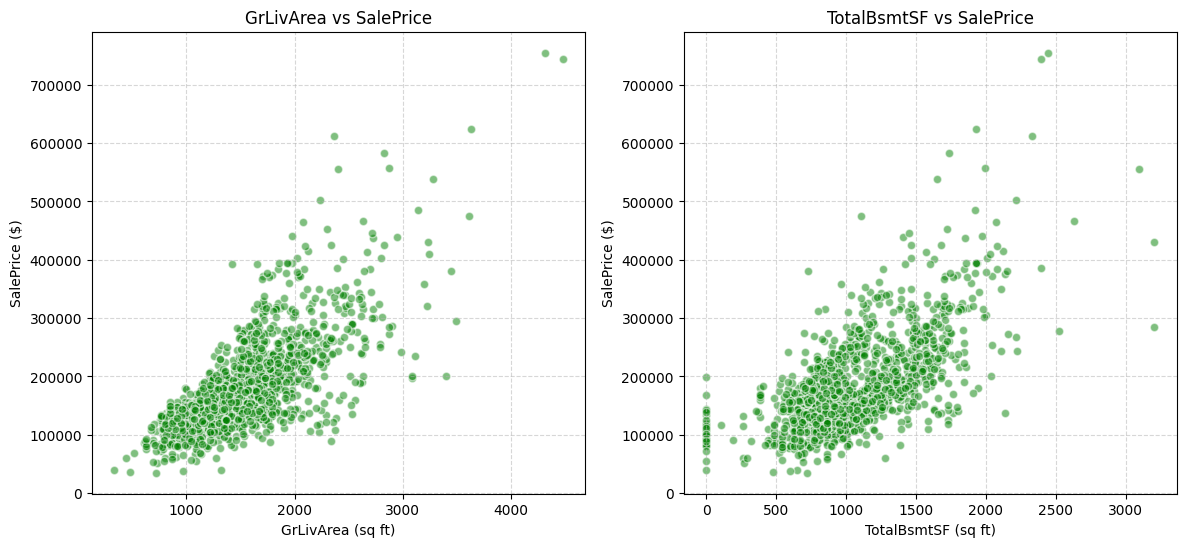

In [3]:
# now, lets check for outliers. the author of the original dataset paper suggested removing outliers in GrLivArea and SalePrice. Lets visualize the outliers first
# since the total basement are should also be correlated with GrLivArea, we have a hunch that removing outliers in GrLivArea should do the same for TotalBsmtSF as well

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
axes[0].scatter(df['GrLivArea'], df['SalePrice'], color='blue', alpha=0.5, edgecolors='white')
axes[0].set_title("GrLivArea vs SalePrice")
axes[0].set_xlabel("GrLivArea (sq ft)")
axes[0].set_ylabel("SalePrice ($)")
axes[0].grid(True, linestyle='--', alpha=0.5)

axes[1].scatter(df['TotalBsmtSF'], df['SalePrice'], color='blue', alpha=0.5, edgecolors='white')
axes[1].set_title("TotalBsmtSF vs SalePrice")
axes[1].set_xlabel("TotalBsmtSF (sq ft)")
axes[1].set_ylabel("SalePrice ($)")
axes[1].grid(True, linestyle='--', alpha=0.5)

# here, we can see ssome outliers with high GrLivArea but low SalePrice. we should remove them
# removing outliers in GrLivArea also does in the TotalBsmtSF

mask = (df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000)
df = df[~mask]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
axes[0].scatter(df['GrLivArea'], df['SalePrice'], color='green', alpha=0.5, edgecolors='white')
axes[0].set_title("GrLivArea vs SalePrice")
axes[0].set_xlabel("GrLivArea (sq ft)")
axes[0].set_ylabel("SalePrice ($)")
axes[0].grid(True, linestyle='--', alpha=0.5)

axes[1].scatter(df['TotalBsmtSF'], df['SalePrice'], color='green', alpha=0.5, edgecolors='white')
axes[1].set_title("TotalBsmtSF vs SalePrice")
axes[1].set_xlabel("TotalBsmtSF (sq ft)")
axes[1].set_ylabel("SalePrice ($)")
axes[1].grid(True, linestyle='--', alpha=0.5)

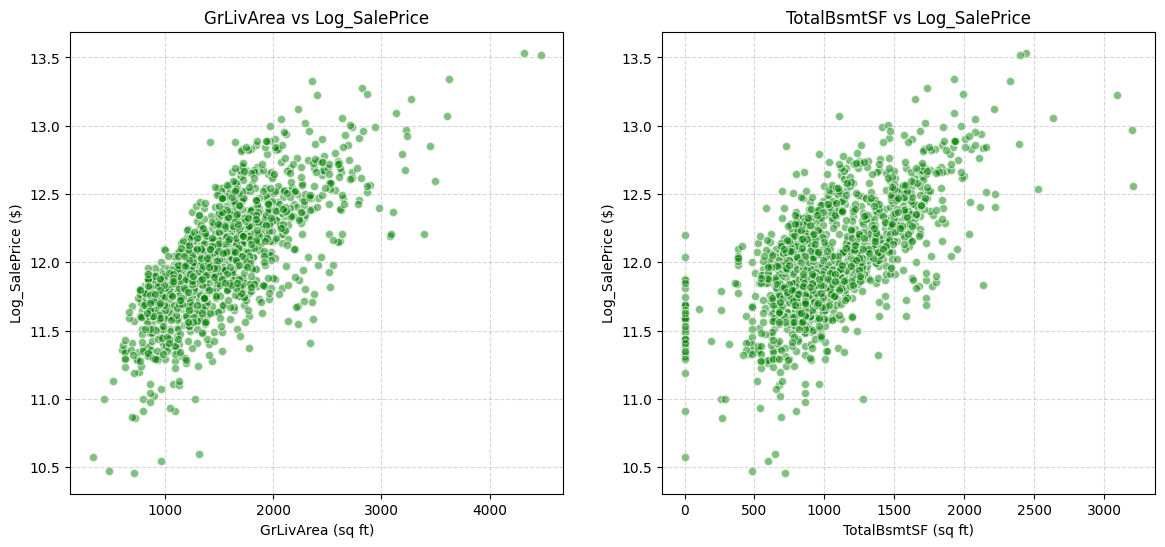

In [4]:
# looking at the same plots, there's also cone shape in data distribution. for standard ML works, maybe log transformation of SalePrice can help

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
axes[0].scatter(df['GrLivArea'], df['Log_SalePrice'], color='green', alpha=0.5, edgecolors='white')
axes[0].set_title("GrLivArea vs Log_SalePrice")
axes[0].set_xlabel("GrLivArea (sq ft)")
axes[0].set_ylabel("Log_SalePrice ($)")
axes[0].grid(True, linestyle='--', alpha=0.5)

axes[1].scatter(df['TotalBsmtSF'], df['Log_SalePrice'], color='green', alpha=0.5, edgecolors='white')
axes[1].set_title("TotalBsmtSF vs Log_SalePrice")
axes[1].set_xlabel("TotalBsmtSF (sq ft)")
axes[1].set_ylabel("Log_SalePrice ($)")
axes[1].grid(True, linestyle='--', alpha=0.5)

/var/folders/30/b1zfy65n6d7224zf0m2dckb40000gn/T/ipykernel_20723/3556897944.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(data_qual, labels=qual_labels, patch_artist=True,
/var/folders/30/b1zfy65n6d7224zf0m2dckb40000gn/T/ipykernel_20723/3556897944.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(data_neigh, labels=sorted_neighborhoods, patch_artist=True,


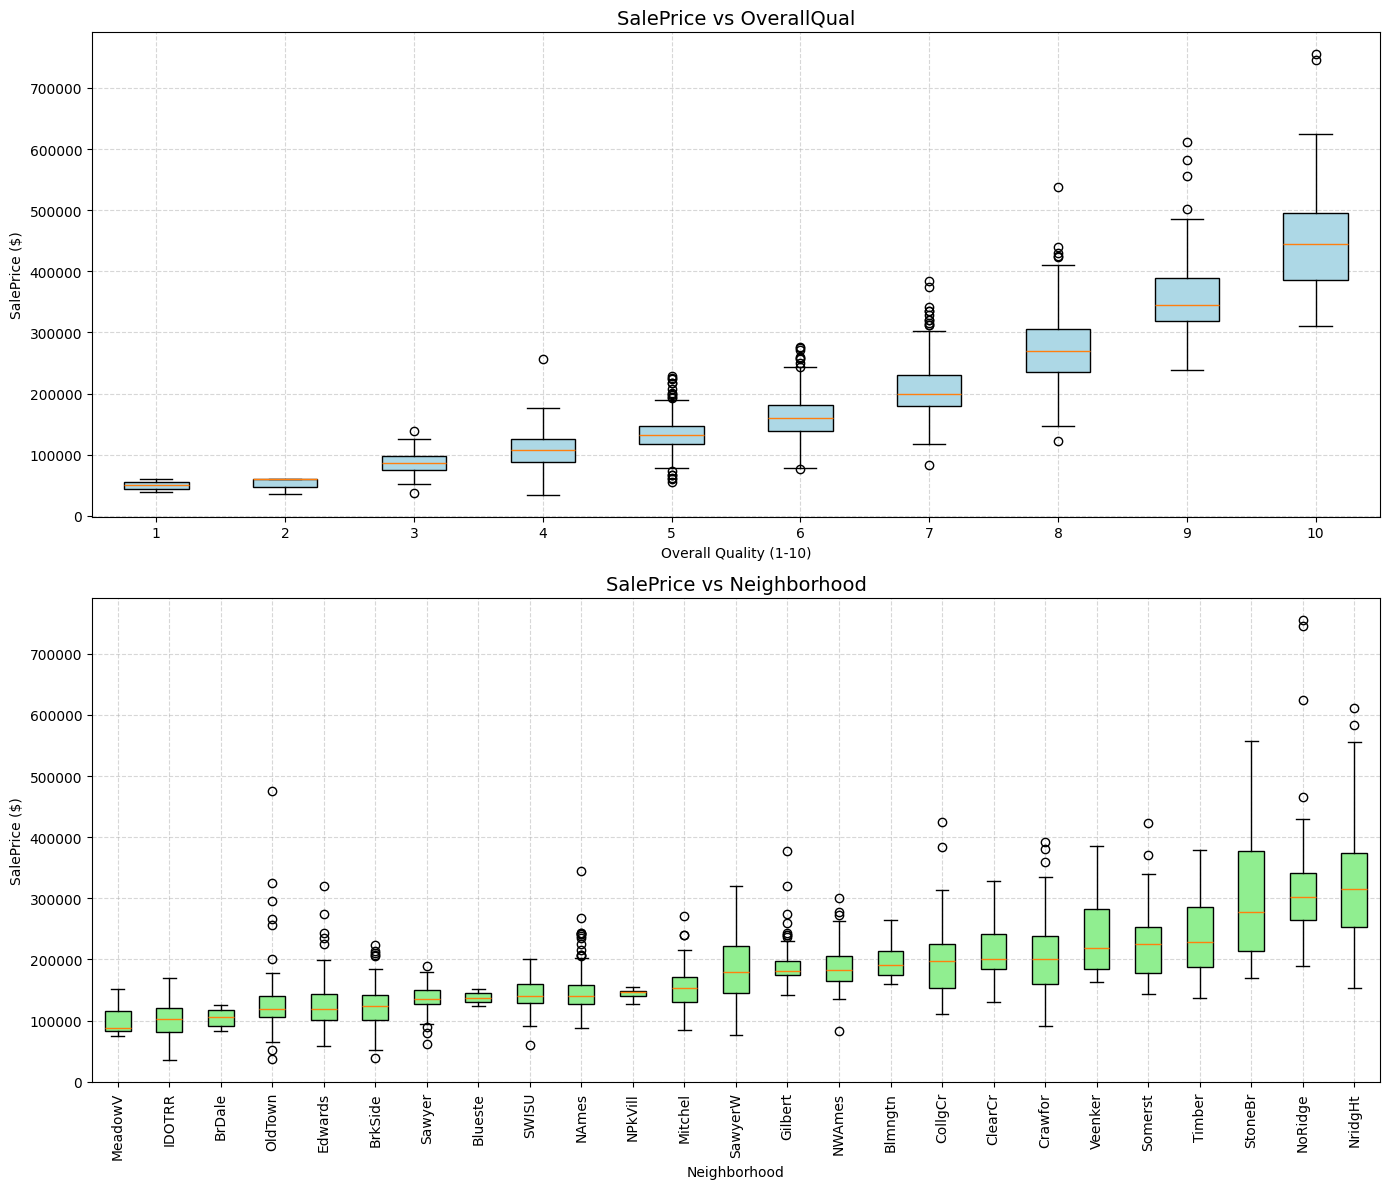

In [5]:
# in this EDA step, we try to evaluate if the neighborhood and overall quality of the house have any impact on the sale price. We will create box plots to visualize the relationshi

data_qual = []
qual_labels = range(1, 11)

for q in qual_labels:
    prices = df[df['OverallQual'] == q]['SalePrice']
    data_qual.append(prices)

median_prices = df.groupby('Neighborhood')['SalePrice'].median().sort_values()
sorted_neighborhoods = median_prices.index

data_neigh = []
for n in sorted_neighborhoods:
    prices = df[df['Neighborhood'] == n]['SalePrice']
    data_neigh.append(prices)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

ax1.boxplot(data_qual, labels=qual_labels, patch_artist=True,
            boxprops=dict(facecolor='lightblue'))
ax1.set_title("SalePrice vs OverallQual", fontsize=14)
ax1.set_xlabel("Overall Quality (1-10)")
ax1.set_ylabel("SalePrice ($)")
ax1.grid(True, linestyle='--', alpha=0.5)

ax2.boxplot(data_neigh, labels=sorted_neighborhoods, patch_artist=True,
            boxprops=dict(facecolor='lightgreen'))
ax2.set_title("SalePrice vs Neighborhood", fontsize=14)
ax2.set_xlabel("Neighborhood")
ax2.set_ylabel("SalePrice ($)")
ax2.tick_params(axis='x', rotation=90)
ax2.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# indeed, it turns out that both OverallQual and Neighborhood have significant impact on SalePrice. We will consider these features in our model later

Features with correlation > 0.8: 5
--------------------------------------------
SalePrice    Log_SalePrice    0.948396
GarageCars   GarageArea       0.887304
GrLivArea    TotRmsAbvGrd     0.829498
YearBuilt    GarageYrBlt      0.825317
OverallQual  Log_SalePrice    0.821405
TotalBsmtSF  1stFlrSF         0.803830
dtype: float64


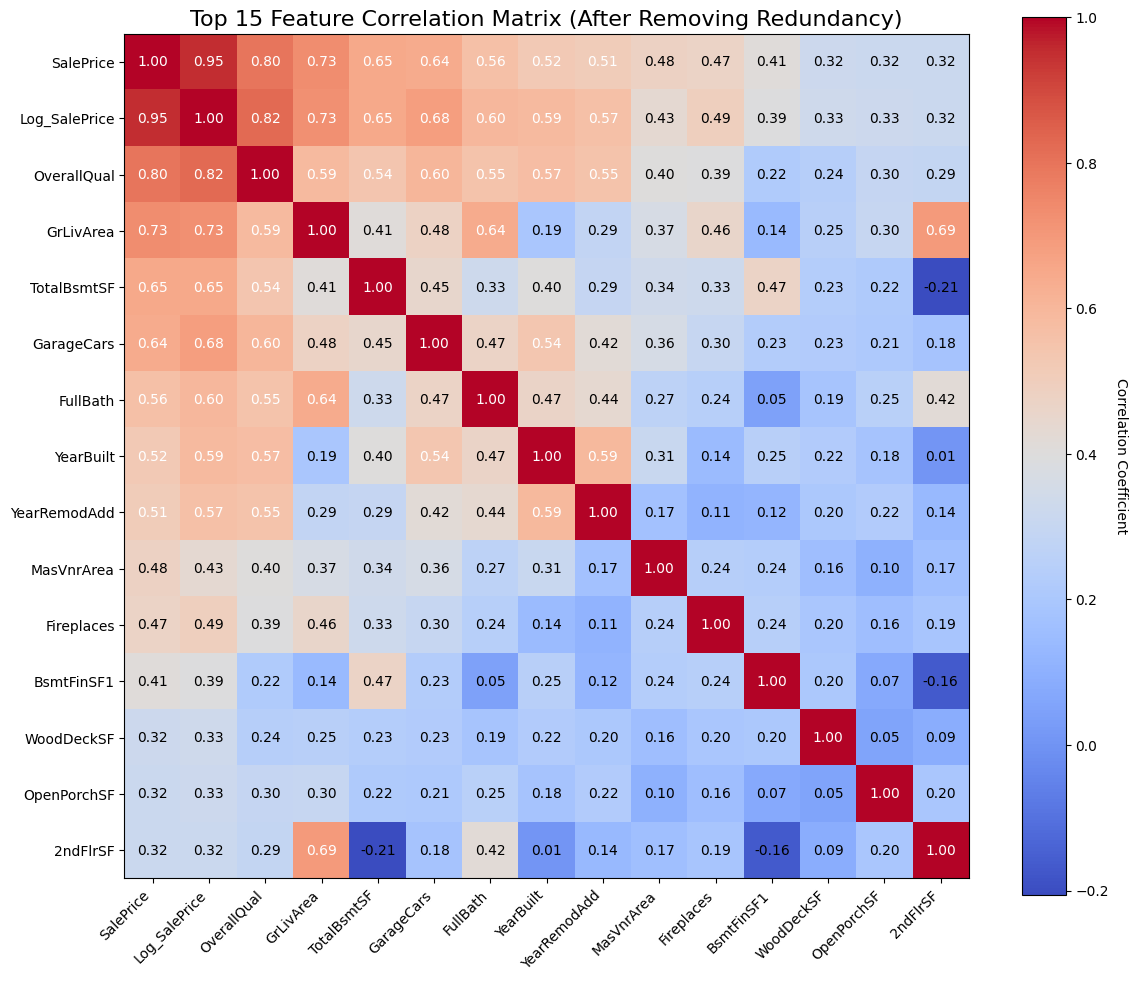

In [6]:
# at this step of EDA, we want to visualize the correlation matrix (only for top 10), to identify features highly correlated with saleprice and features that might be redundant to confuse the model
# first we print all the columns that have high correlation among each other. when we have that, we decide to loose columns based on those correlation to avoid multicollinearity

numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

print(f"Features with correlation > 0.8: {len(to_drop)}")
print("--------------------------------------------")

stacked = upper_tri.stack()
high_corr_pairs = stacked[stacked > 0.8]

print(high_corr_pairs.sort_values(ascending=False))

cols_to_remove = ['GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd', '1stFlrSF']      # now, we select more needed columns from these pairs to avoid multicollinearity
df = df.drop(columns=cols_to_remove, errors='ignore')

# now, we try to print the correlation matrix of top 10 features, while doing so we encountered some NaN values that we need to deal with. for now, lets fill them with 0
df_1 = df.fillna(0)

k = 15
numeric_df = df_1.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_1[cols].values.T)

fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(cm, interpolation='nearest', cmap='coolwarm')
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correlation Coefficient", rotation=-90, va="bottom")
ax.set_xticks(np.arange(len(cols)))
ax.set_yticks(np.arange(len(cols)))
ax.set_xticklabels(cols, rotation=45, ha="right", fontsize=10)
ax.set_yticklabels(cols, fontsize=10)

for i in range(len(cols)):
    for j in range(len(cols)):
        color = "white" if abs(cm[i, j]) > 0.5 else "black"
        text = ax.text(j, i, f"{cm[i, j]:.2f}",
                       ha="center", va="center", color=color, fontsize=10)

ax.set_title("Top 15 Feature Correlation Matrix (After Removing Redundancy)", fontsize=16)
plt.tight_layout()
plt.show()

Found 20 skewed features (threshold > 0.75):
MiscVal          24.460085
PoolArea         15.948945
LotArea          12.573925
3SsnPorch        10.297106
LowQualFinSF      9.004955
KitchenAbvGr      4.484883
BsmtFinSF2        4.251925
ScreenPorch       4.118929
BsmtHalfBath      4.100114
EnclosedPorch     3.087164
MasVnrArea        2.687784
OpenPorchSF       2.339829
SalePrice         1.881296
WoodDeckSF        1.545805
LotFrontage       1.543043
MSSubClass        1.407011
GrLivArea         1.010992
BsmtUnfSF         0.920903
2ndFlrSF          0.812957
BsmtFinSF1        0.764789
dtype: float64


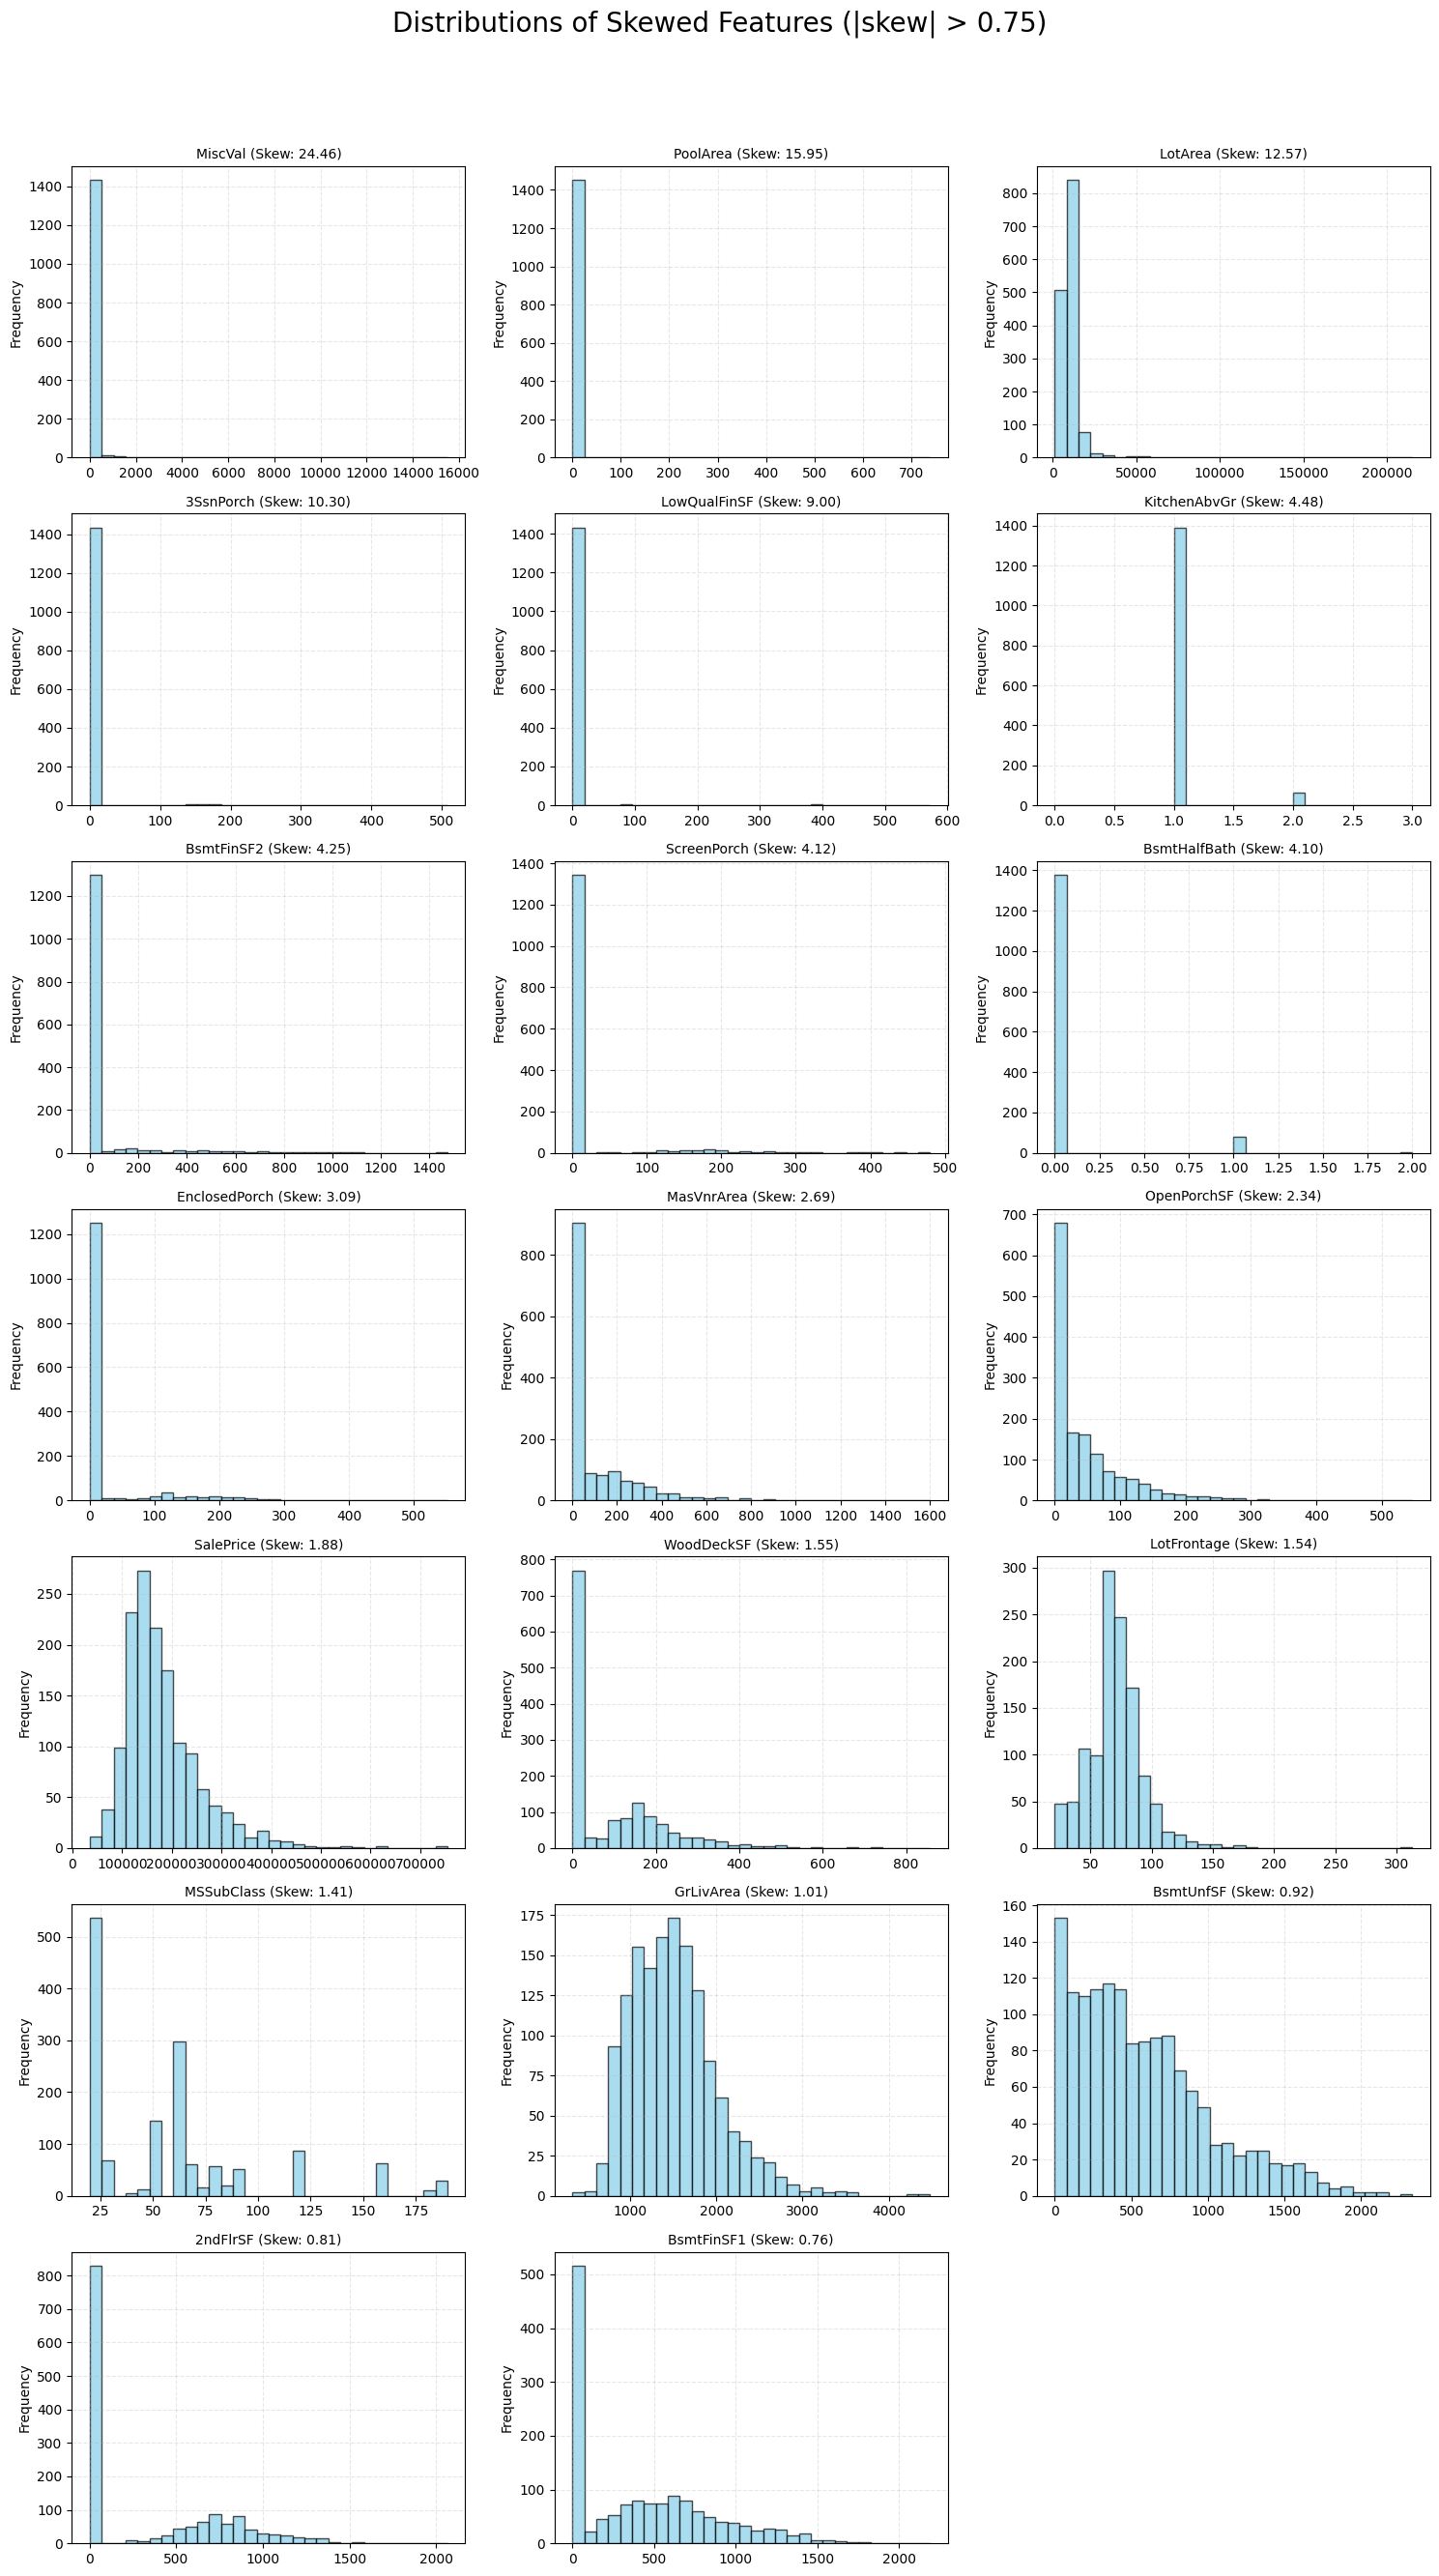

In [7]:
# now we can be confident that our numerical data is dealt with well. so lets now first see what other data might have skewness
import math

numeric_df = df.select_dtypes(include=[np.number])
skewness = numeric_df.skew().sort_values(ascending=False)
skew_threshold = 0.75
skewed_features = skewness[abs(skewness) > skew_threshold]

print(f"Found {len(skewed_features)} skewed features (threshold > {skew_threshold}):")
print(skewed_features)

# since there are a great amount of columns with skewed data, we should do log transformation to them only when it's actually necessary

num_plots = len(skewed_features)
cols = 3
rows = math.ceil(num_plots / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
fig.suptitle(f"Distributions of Skewed Features (|skew| > {skew_threshold})", fontsize=20)
axes = axes.flatten() # Flatten 2D array to 1D for easy looping

for i, feature in enumerate(skewed_features.index):
    ax = axes[i]
    
    # Plot Histogram
    # 'bins=30' gives good resolution. 'alpha=0.7' makes it slightly transparent.
    ax.hist(df[feature].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    
    # Add labels showing the exact skewness value
    ax.set_title(f"{feature} (Skew: {skewed_features[feature]:.2f})", fontsize=10)
    ax.set_ylabel("Frequency")
    ax.grid(True, linestyle='--', alpha=0.3)

# Hide any empty subplots (if num_plots isn't a perfect multiple of 3)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust for the main title
plt.show()

# out of these columns with skewness, transforming LotArea, GrLivArea and LotFrontage into log scale make sense, the rest does not.
df['Log_LotArea'] = np.log1p(df['LotArea'])
df['Log_GrLivArea'] = np.log1p(df['GrLivArea'])
df['Log_LotFrontage'] = np.log1p(df['LotFrontage'])

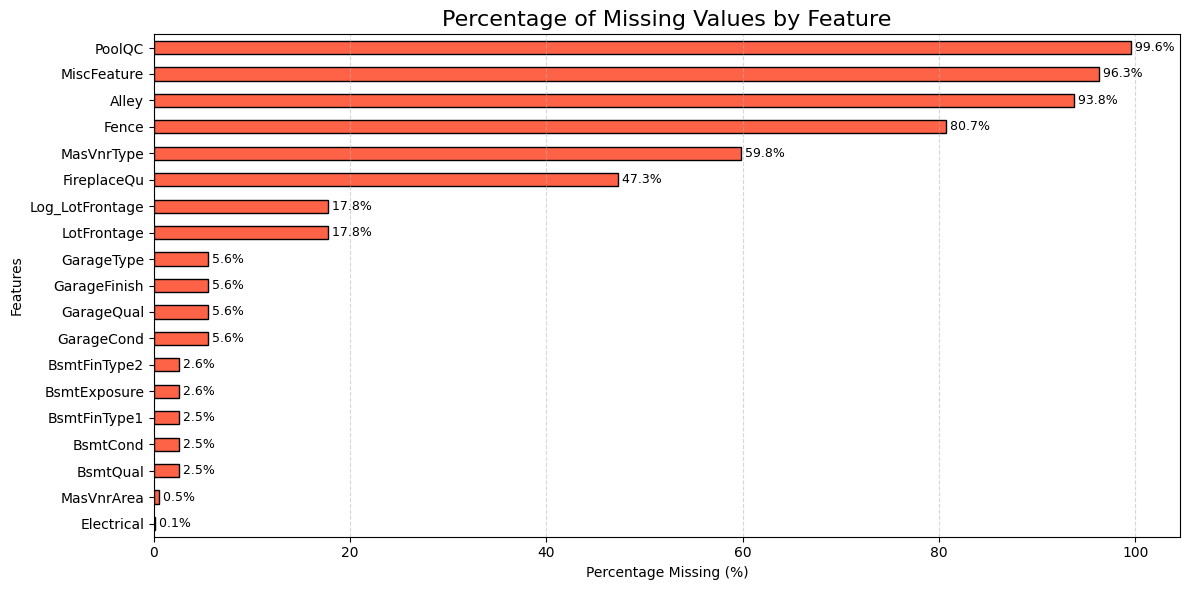

Total missing values remaining in dataset: 0


In [8]:
# in this stage of EDA, lets look at the missing values (if any)

missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing_percent = (missing / len(df)) * 100

plt.figure(figsize=(12, 6))
ax = missing_percent.plot.barh(color='tomato', edgecolor='black')

plt.title("Percentage of Missing Values by Feature", fontsize=16)
plt.xlabel("Percentage Missing (%)")
plt.ylabel("Features")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

for index, value in enumerate(missing_percent):
    plt.text(value, index, f" {value:.1f}%", va='center', fontsize=9)

plt.tight_layout()
plt.show()

# as the plot shows, there are some columns that have very high missing values (>90%) and some low. we need to evaluate what to do with these missing values

# For columns like PoolQC, MiscFeature, Alley, Fence, and FireplaceQu, a 'NaN' value does not mean data is lost. It effectively acts as a boolean flag meaning "This house does not have this feature."
# action: We will fill these 'NaN's with the string "None" to create a new category.
# These features (GarageType, GarageFinish, BsmtQual) appear in groups. If a house has no garage, all garage categorical variables (Type, Qual, Cond) are NaN, and all numerical variables (Area, Cars) are NaN.
# action: Categorical Garage/Bsmt/Masonry columns -> Fill with "None". Numerical Garage/Bsmt/Masonry columns   -> Fill with 0.
# Every house definitely has a street frontage; the data is genuinely missing. Since lot frontage is physical geometry, it is highly correlated with the specific neighborhood density (specific streets have standard lot widths).
# action: We fill 'NaN' in LotFrontage with the median LotFrontage of that specific Neighborhood.
# There is only 1 missing value here. It is safe to assume this house has the standard system.
# action: Fill with the Mode (Most frequent value), which is 'SBrkr'.

cols_to_fill_none = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'MasVnrType'
]

for col in cols_to_fill_none:
    df[col] = df[col].fillna("None")

cols_to_fill_zero = [
    'GarageYrBlt', 'GarageCars', 'GarageArea',
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
    'MasVnrArea'
]

for col in cols_to_fill_zero:
    if col in df.columns:
        df[col] = df[col].fillna(0)

df['LotFrontage'] = df.groupby("Neighborhood")['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

df['Log_LotFrontage'] = df.groupby("Neighborhood")['Log_LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

remaining_missing = df.isnull().sum().sum()
print(f"Total missing values remaining in dataset: {remaining_missing}")

if remaining_missing > 0:
    print("\nColumns still containing missing values:")
    print(df.isnull().sum()[df.isnull().sum() > 0])

In [9]:
# at last, we convert the categorical features and look at our final train data. before doing that, cleaning the columns we have used to create new ones is important

cols_to_drop = [
    'Id', 
    'LotArea',      # Replaced by Log_LotArea
    'GrLivArea',    # Replaced by Log_GrLivArea
    'LotFrontage',  # Replaced by Log_LotFrontage
    'SalePrice'     # Replaced by Log_SalePrice (This is your new Target)
]
df.drop(columns=cols_to_drop, inplace=True)

df['MSSubClass'] = df['MSSubClass'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)
df['YrSold'] = df['YrSold'].astype(str)

df_encoded = pd.get_dummies(df, drop_first=True)

display(df.head(15))

# at last, save the prepared data in disc for training
df_encoded.to_csv("data/train_clean.csv", index= False)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Log_SalePrice,Log_LotArea,Log_GrLivArea,Log_LotFrontage
0,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,None,0,2,2008,WD,Normal,12.247699,9.042040,7.444833,4.189655
1,20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,None,0,5,2007,WD,Normal,12.109016,9.169623,7.141245,4.394449
2,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,None,0,9,2008,WD,Normal,12.317171,9.328212,7.488294,4.234107
3,70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,None,0,2,2006,WD,Abnorml,11.849405,9.164401,7.448916,4.110874
4,60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,None,0,12,2008,WD,Normal,12.429220,9.565284,7.695758,4.442651
5,50,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,...,Shed,700,10,2009,WD,Normal,11.870607,9.555064,7.217443,4.454347
6,20,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,...,None,0,8,2007,WD,Normal,12.634606,9.218804,7.435438,4.330733
7,60,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,...,Shed,350,11,2009,WD,Normal,12.206078,9.247925,7.645398,4.394449
8,50,RM,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,...,None,0,4,2008,WD,Abnorml,11.774528,8.719481,7.481556,3.951244
9,190,RL,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,...,None,0,1,2008,WD,Normal,11.678448,8.912069,6.982863,3.931826
